In [ ]:
!pip install shap


<ipython-input-2-1925db67c66f>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, features=X_test[:10], feature_names=X.columns.tolist())


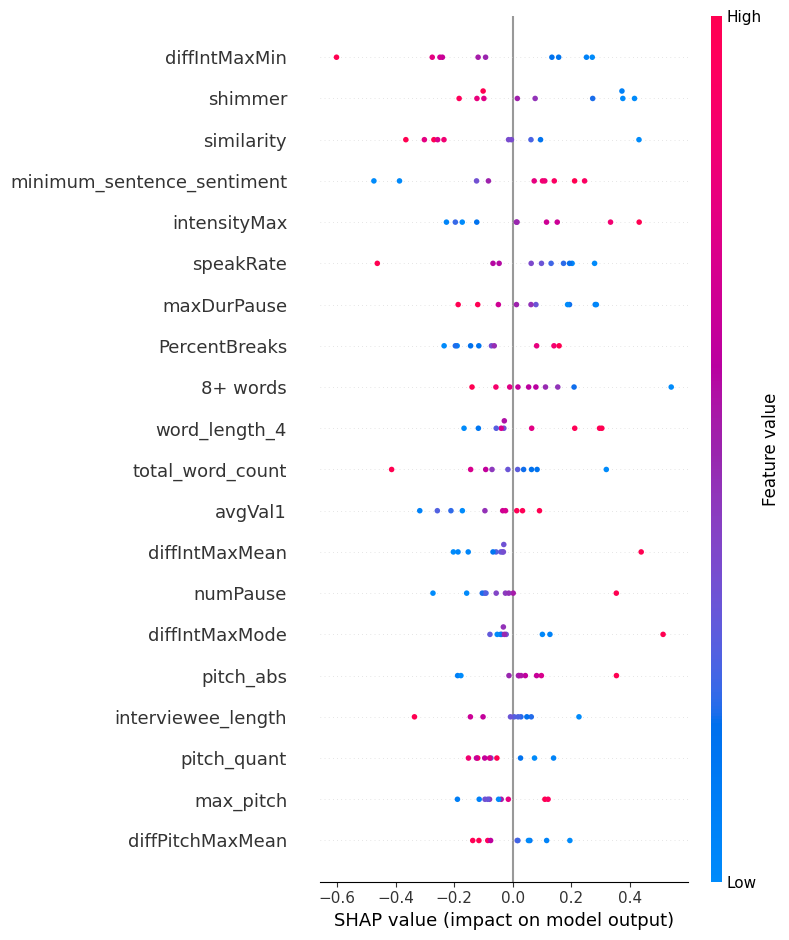

In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv("combined_features_dataset.csv")
X = data.drop(columns=["id", "cluster"])
y = data["cluster"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Train simple MLP
model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=1)
model.fit(X_train, y_train)

# SHAP explanation (use small sample for speed)
explainer = shap.Explainer(model.predict, X_train[:50])
shap_values = explainer(X_test[:10])

# Summary plot
shap.summary_plot(shap_values, features=X_test[:10], feature_names=X.columns.tolist())
